In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


### https://www.kaggle.com/c/titanic/data

In [5]:
##Cargamos los datos Train
df_titanic1 = pd.read_csv('../train.csv')

In [6]:
##Vemos su cabecera
df_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Vemos al dimension del dataframe Train
df_titanic1.shape


(891, 12)

In [8]:
## Cargamos datos Test
df_titanic2 = pd.read_csv('../test.csv')

In [9]:
##Vemos su cabecera
df_titanic2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Dimension de tesr
df_titanic2.shape

(418, 11)

In [8]:
#Cargamos la variable objetivo y
df_y = pd.read_csv('../titanic-y.csv',sep=';')

In [9]:
#Observamos cabecera variable objetivo
df_y.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [10]:
#El numero de filas es el mismo que la suma de Train & Test
df_y.shape

(1309, 2)

In [11]:
#Comprobamos el numero de datos unicos ( ninguno se repite)
len(df_y.PassengerId.unique())

1309

In [12]:
#En Train aparece la culumna de supervivientes = Y, asi que la quitamos
df_titanic1.drop(columns = ['Survived'], inplace =True)

In [13]:
#Concatenamos los 2 archivos y el inner se hacer por el Id de pasajero
df_titanic = pd.concat([df_titanic1, df_titanic2])
df_titanic.set_index(['PassengerId'], inplace=True)

In [14]:
#Observamos la nueva cabecera del dataframe concatenado
df_titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#Estos son los nombres de las columnas
df_titanic.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [16]:
#El numero de filas coincide con el de Y
df_titanic.shape

(1309, 10)

In [17]:
#Descripcion estadistica de las variables numericas solamente. la edad minima es 0.17 annos, tendremos que revisqr si hay 
#valores float de edad o es que se ha colado. E n cuanto a pasajeros el valor min=1 y max=3, el 25% datos en segunda clase y el 
#50% en 3 clase. La media de lo que se pago fueron 33.29usd y el maximo 512usd.

df_titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
#Aqui podemos saber la categoria de cada variable, las que son numericas y cuales no (objet)
df_titanic.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### ¿Tenemos valores categóricos?

In [19]:
df_titanic.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### ¿Tenemos valores nulos?

In [20]:
#sacamos valores nulos para cada una de las variables, los estamos sumando. En edad aparecen 263 nulos sobre 1309
#cabina es una candidata a desaparecer del dataset porque hay muchos valores nulos
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [22]:
#Estamos contando los valores de edad y se observa que estan bastante repartidos
edad = df_titanic["Age"].value_counts(ascending= False)

In [23]:
edad.head(10)

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
25.0    34
28.0    32
36.0    31
26.0    30
29.0    30
Name: Age, dtype: int64

C:\Users\cesar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

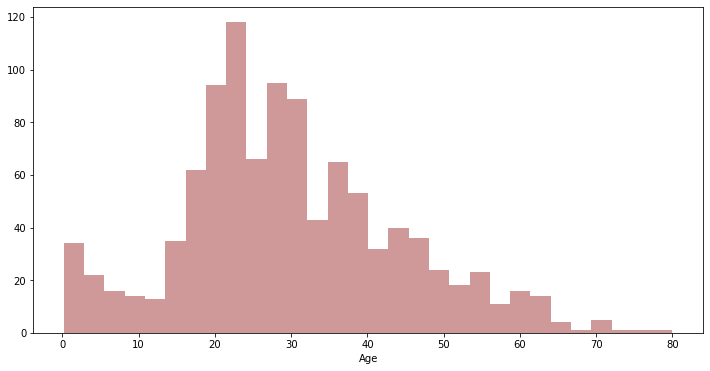

In [24]:
# Se observa una distribucion de edad mas o menos normal. El grueso de la edad estaba entre 20 y 40  annos, habia tambien muchos ninnos 
# y pocos entre 70 y 80 annos.
plt.figure(figsize=(12,6))
sns.distplot(df_titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

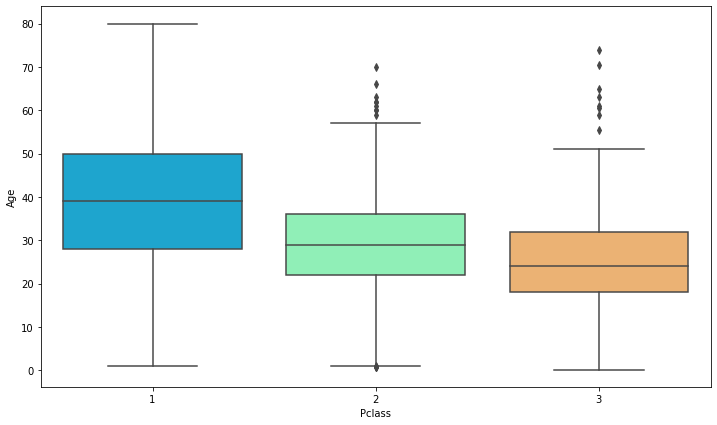

In [25]:
#Boxplot para ver como se distribuyen pasajeros por edades y por clases y la gente mayor era muy rica y se observa
#valores mayores de 0, se comprueba que viajaban en familia. En 2 y 3 clase la gente era mas joven y se ven outliers de 
#gente mayor.

#Para rellenar los valores nulos de la edad lo vamos a hacer con la media de cada una de las clases

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_titanic,palette='rainbow')

In [26]:
df_titanic.iloc[5]

Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [ ]:
#Rellenaremos la media de edad con esta funcion lambda para los valores nulo, 
#donde le ponemos 25 annos si son de 3 clase, 29 annos si son de segunda y 39 si son de tercera

In [27]:
#Podemos hacerlo con este bucle que es exactamente lo mismo.
lista_edad = []

for i in range(len(df_titanic)):
    if pd.isnull(df_titanic.iloc[i]['Age']):
        if df_titanic.iloc[i]['Pclass'] == 1:
            lista_edad.append(39)
        elif df_titanic.iloc[i]['Pclass'] == 2:
            lista_edad.append(29)
        else:
            lista_edad.append(25)
    else:
        lista_edad.append(df_titanic.iloc[i]['Age'])
        
df_titanic['Age'] = lista_edad        
            

In [28]:
#Comprobamos ahora que no hay nulkos en la edad
df_titanic.isnull().sum()


Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [29]:
#Puerto de embarque nulos hay 2, una idea es rellenarlo con la moda
df_titanic[df_titanic['Embarked'].isnull()]


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [30]:
#asi que sacamos cuantos registros hay para cada tipo y vemos que la mayoria salieron desde la ciudad de Southhampton
df_titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [31]:
df_titanic['Embarked']=df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [32]:
#Para la tarifa tenemos como opcion rellenarla con la media:
df_titanic['Fare'].mean()

33.2954792813456

In [33]:
df_titanic['Fare']=df_titanic['Fare'].fillna(df_titanic['Fare'].mean())

In [34]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

#### ¿Qué hacemos con los nombres repetidos ?

In [35]:
#Comprobamos que hay 2 valores de nombres de persona que estan repetidos;
df_titanic['Name'].value_counts()

Kelly, Mr. James                                         2
Connolly, Miss. Kate                                     2
Malachard, Mr. Noel                                      1
Duane, Mr. Frank                                         1
Bird, Miss. Ellen                                        1
                                                        ..
Petranec, Miss. Matilda                                  1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)        1
Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)    1
Peacock, Mrs. Benjamin (Edith Nile)                      1
Boulos, Miss. Nourelain                                  1
Name: Name, Length: 1307, dtype: int64

In [36]:
#Encontramos 2 personas que se llamaban igual pero tenian diferente edad y pudiera ser un error
len(list(df_titanic['Name'].unique()))
len(df_titanic['Name'])
df_titanic['Name'][df_titanic['Name'].duplicated() == True]
print(df_titanic[df_titanic['Name'] == 'Kelly, Mr. James'])
print(df_titanic[df_titanic['Name'] == 'Connolly, Miss. Kate'])

             Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
PassengerId                                                               
697               3  Kelly, Mr. James  male  44.0      0      0  363592   
892               3  Kelly, Mr. James  male  34.5      0      0  330911   

               Fare Cabin Embarked  
PassengerId                         
697          8.0500   NaN        S  
892          7.8292   NaN        Q  
             Pclass                  Name     Sex   Age  SibSp  Parch  Ticket  \
PassengerId                                                                     
290               3  Connolly, Miss. Kate  female  22.0      0      0  370373   
898               3  Connolly, Miss. Kate  female  30.0      0      0  330972   

               Fare Cabin Embarked  
PassengerId                         
290          7.7500   NaN        Q  
898          7.6292   NaN        Q  


In [37]:
len(df_titanic['Name'].unique())

1307

#### Podemos crear variables nuevas

In [38]:
# A traves de una expresion regular ' ([A-Za-z]+)\.' sacar de cada uno de los nombres el titulo Mr., Ms,...
df_titanic['Title'] = df_titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [39]:
df_titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [40]:
# Y si vemos cuanto se repiten estos valores, vemos que casi todo el gruespo se encuentra entre los 3 primeros.
df_titanic.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Don           1
Sir           1
Capt          1
Jonkheer      1
Lady          1
Dona          1
Mme           1
Countess      1
Name: Title, dtype: int64

In [41]:
#Agrupamos esta categoria en clase rara, Miss y Mrs
df_titanic['Title'] = df_titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')

In [42]:
#eliminamos la columna nombre y mantenemos la de title que luego cambiaremos a numerica. Asi parovechamos la variable \
#nombre y no la eliminamosdel todo.
df_titanic.drop(columns = ['Name'], inplace=True)

#### ¿Tenemos valores únicos?

In [43]:
#La calse son 3 valores, el sexo 2 valores, la edad tiene muchos valores, los parentescos tienen varios valores pero 
#la mayoria viajaban solos sin familia. El ticket no tiene una distribucion logica y parece candidata a ser eliminada.
#la tarifa aunque tiene muchos valores unicos se pueden agrupar por rango de tarifa. por ultimo la variable cabina, casi 
#todos tienen un unico valor y muy poco repetidos asi que es candidata a swr eliminada. El puerto si aporta bastante, y el 
#titulo Mr.. si podria dar alguna info extra 

for j in df_titanic.columns:
    print(j)
    print(df_titanic[j].value_counts())

Pclass
3    709
1    323
2    277
Name: Pclass, dtype: int64
Sex
male      843
female    466
Name: Sex, dtype: int64
Age
25.00    242
39.00     59
24.00     47
29.00     46
22.00     43
        ... 
22.50      1
74.00      1
24.50      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
Ticket
CA. 2343    11
1601         8
CA 2144      8
347077       7
3101295      7
            ..
312992       1
345769       1
363272       1
65304        1
394140       1
Name: Ticket, Length: 929, dtype: int64
Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
8.0292      1
12.7375     1
8.6542      1
34.0208     1
7.1417      1
Name: Fare, Length: 282, dtype: int64
Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26        

#### Variables categóricas

In [44]:
#Variables que no son numericas y si vamos a pasar a numericas:
df_titanic.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Title        object
dtype: object

In [45]:
#La variable sexo tiene 2 valores : male y female
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [46]:
#Hay diferentes formas de hacerlo, con replace, variable dummies o en este caso con map y pasara a ser 0 y 1.
df_titanic['Sex'] = df_titanic['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [47]:
#¿borramos variable ticket? Si
df_titanic.drop('Ticket', axis=1, inplace=True)

In [48]:
len(df_titanic['Cabin'].unique())

187

In [49]:
df_titanic['Cabin'].isnull().sum()

1014

In [50]:
#La variable cabin la borramkos tambien
df_titanic.drop('Cabin', axis=1, inplace=True)

In [51]:
#La variable puerto de embarque tiene 3 valores S,C y Q
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
df_titanic.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,Mr
2,1,1,38.0,1,0,71.2833,C,Mrs
3,3,1,26.0,0,0,7.9250,S,Miss
4,1,1,35.0,1,0,53.1000,S,Mrs
5,3,0,35.0,0,0,8.0500,S,Mr


In [53]:
# y la vamos a convertir en una variable dummy
embarked = pd.get_dummies(df_titanic['Embarked'])

In [54]:
embarked?

In [55]:
embarked.head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [ ]:
#Insertamos las culumnas y luego eliminariamos cada una de las variables
df_titanic.insert(8,'Cherbourg',embarked['C'])
df_titanic.insert(9,'Queenstown',embarked['Q'])
df_titanic.insert(10,'Southampton',embarked['S'])

In [56]:
df_titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [57]:
## Encode target labels with value between 0 and n_classes-1.
# Otra manera de hacer los dummies.

transform1 = LabelEncoder()
transform1.fit_transform(['Q','C','S'])
print(transform1.classes_)
print(transform1.transform(df_titanic['Embarked']))

prueba = transform1.transform(df_titanic['Embarked'])


['C' 'Q' 'S']
[2 0 2 ... 2 2 0]


In [58]:
##Encode categorical features as a one-hot numeric array.
# Otra manera de hacer los dummies tambien. 

transform2 = OneHotEncoder() 
transform2.fit_transform(prueba.reshape(len(prueba), 1)).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [59]:
#borramos la variable embarque
df_titanic.drop('Embarked', axis=1, inplace=True)

In [60]:
#Podemos hacer un mapeo de los titulos
mapeo = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_titanic['Title'] = df_titanic['Title'].map(mapeo)

In [62]:
#Ya nos queda nuestro dataframe limpio
df_titanic.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Title     0
dtype: int64

In [63]:
#Y nuestros tipos todos numericos
df_titanic.dtypes

Pclass      int64
Sex         int32
Age       float64
SibSp       int64
Parch       int64
Fare      float64
Title       int64
dtype: object

#### Conjuntos Train-Test

In [64]:
#cargamos nuestra y
titanic_y = pd.read_csv('../titanic-y.csv',sep = ';')

In [65]:
#Seteamos el indice como passenger id para poder hacer el mergeo
titanic_y.set_index('PassengerId', inplace=True)

In [66]:
titanic_y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [67]:
#Vemos los valores unicos
titanic_y.Survived.unique()

array([0, 1], dtype=int64)

In [70]:
#Aqui hacemos nuestro muestreo.
#Vamos a sacar nuestra X_train e Y_train para poder entrenar nuestra X e Y y lo mismo con muestro conjunto de validacion.
#La funcion de sklear se llama asi:train_test_split(1 conjunto de datos que queremos dividir,2 lemetemos la Y, 
# 3 el tamanno del Test o el tamanno del train, 4 semilla de aleatorizacion, 5 columna para estratificacion de los datos)


X_train, X_test, y_train, y_test = train_test_split( df_titanic,
                        titanic_y,
                        test_size=0.2,
                        random_state=42,
                        stratify = titanic_y)

In [71]:
#Longitud de X_train
len(X_train)

1047

In [72]:
#Longitud de X_test
len(X_test)

262

In [73]:
#Longitud de Y_train
len(y_train)

1047

In [74]:
#Longitud de Y_test
len(y_test)

262

In [75]:
#pegamos al conjunto de entrenamiento la Y
traindf = pd.concat([X_train,y_train], axis=1)

In [76]:
#vemos su cabecera
traindf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Survived
PassengerId,,,,,,,,
1022,3,0,32.0,0,0,8.0500,1,0
319,1,1,31.0,0,2,164.8667,2,1
925,3,1,25.0,1,2,23.4500,3,1
653,3,0,21.0,0,0,8.4333,1,0
1190,1,0,30.0,0,0,45.5000,1,0


In [77]:
testdf = X_test

### Correlación de variables

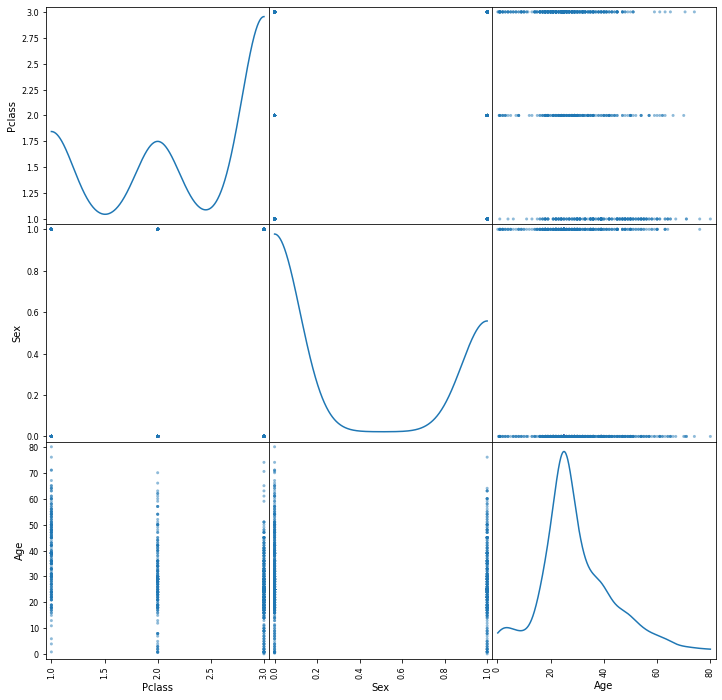

In [78]:
features = ['Pclass','Sex','Age']
from pandas.plotting import scatter_matrix

scatter_matrix(traindf[features], figsize = (12, 12), diagonal = 'kde');

<AxesSubplot:>

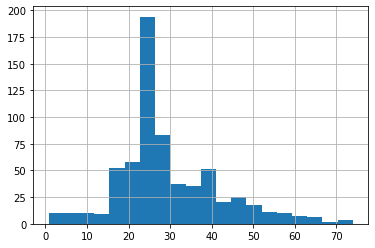

In [79]:
#Histograma sobre si no ha sobrevivido: Murieron muy pocos ninnos.
traindf['Age'][traindf['Survived']==0].hist(bins=20)

<AxesSubplot:>

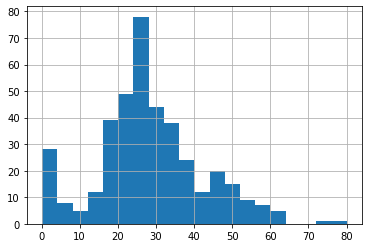

In [80]:
#Histograma sobre si ha sobrevivido : Sobreviven muchos ninnos
traindf['Age'][traindf['Survived']==1].hist(bins=20)

#### Al comparar los histogramas de los que han sobrevivido por edades se puede ver que la supervivencia aumenta por debajo de los 20 años y vuelve aumentar en torno a los 30 y los 45 años. Esto se puede utilizar para realizar una agrupación de las variables. Podemos ver como se comporta el modelo en una primera versión y añadir una transformación de variables

### Escalado de Características

In [81]:
## Prueba ejemplo de escalado (cuando el modelo de ML le da más importancia a una categoría que a otra).

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
prueba_escalado = sc.fit_transform(X_train)

In [82]:
prueba_escalado[0]

array([ 0.83946169, -0.74857042,  0.20352157, -0.47350156, -0.42482001,
       -0.47346752, -0.71760571])

#### Podemos normalizar o estandarizar

#### Estandarizar =  ( x – media(x) ) / desviación típica(x)
#### Normalizar = (x-min(x) / max-min(x))

#### Con esto conseguimos que ninguna variable domine sobre otra

### Detección outliers

<AxesSubplot:xlabel='Fare'>

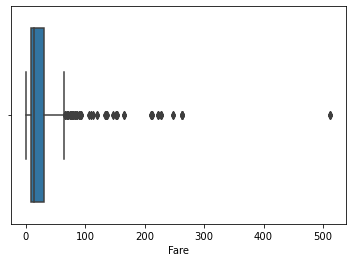

In [83]:
#Se ve un valor de outlier muy elevado en cuanto al precio del billete ( 512.32usd) cuando la media estaba en torno a 32. 
#Hay un valor que tiene pienta de ser outlier. 
sns.boxplot(x=X_train['Fare'])

In [84]:
#Vamos a filtrar por valores superiores a 262
X_train[X_train['Fare'] > 262]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,,,,,,,
1267,1,1,45.0,0,0,262.3750,2
1034,1,0,61.0,1,3,262.3750,1
945,1,1,28.0,3,2,263.0000,2
956,1,0,13.0,2,2,262.3750,4
1235,1,1,58.0,0,1,512.3292,3
743,1,1,21.0,2,2,262.3750,2
680,1,0,36.0,0,1,512.3292,1
312,1,1,18.0,2,2,262.3750,2
738,1,0,35.0,0,0,512.3292,1


#### Hay varias maneras de "corregir" estos outliers. Aquí se va a utilizar la función matemática Z_score

In [85]:
# Las buenas maneras dicen que los outliers tienen un valor de Z-Score mayor a 3
z = np.abs(stats.zscore(X_train['Fare']))
print(z)

[0.47346752 2.45248078 0.1861282  ... 0.48380801 0.0639157  0.47634465]


In [86]:
threshold = 3
print(np.where(z > 3))

(array([   7,    8,   35,  127,  183,  184,  199,  219,  271,  274,  328,
        329,  420,  508,  535,  684,  725,  726,  741,  771,  786,  790,
        793,  829,  837,  862,  873,  926,  952, 1004, 1030, 1043],
      dtype=int64),)


In [87]:
X_train.reset_index().iloc[7]

PassengerId    1267.000
Pclass            1.000
Sex               1.000
Age              45.000
SibSp             0.000
Parch             0.000
Fare            262.375
Title             2.000
Name: 7, dtype: float64

In [88]:
traindf.to_csv('train_titanic.csv')

In [89]:
testdf.to_csv('test_titanic.csv')